<a href="https://colab.research.google.com/github/TokisakiKyoki/BiblioTechMontenegroChinchillaSemestreIAnno2018/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


4


(60000, 28, 28)

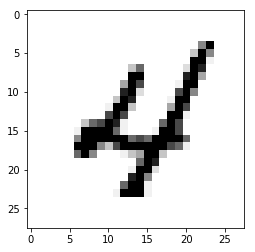

In [0]:
import matplotlib.pyplot as plt
image_index = 7779
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

In [0]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.2101 - acc: 0.9368
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0835 - acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0574 - acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0451 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0355 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0293 - acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0238 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0234 - acc: 0.9916
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0191 - acc: 0

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 53us/step


[0.04892237437301737, 0.9869]

8


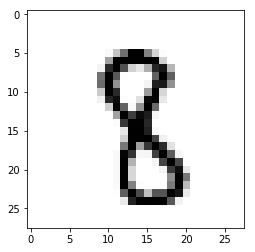

In [0]:
image_index = 4496
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())